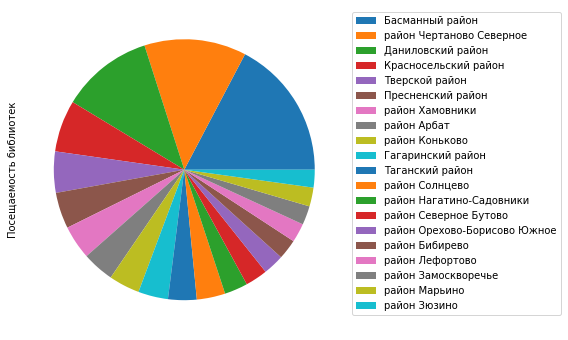

In [1]:
'''Используя данные по посещаемости библиотек в районах Москвы
https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json
постройте круговую диаграмму суммарной посещаемости (NumOfVisitors) 20 наиболее популярных районов Москвы.
Создайте PDF отчет, используя файл
https://video.ittensive.com/python-advanced/title.pdf
как первую страницу. На второй странице выведите итоговую диаграмму, самый популярный район Москвы и число
посетителей библиотек в нем.'''

from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from PyPDF2 import PdfFileMerger, PdfFileReader
from PIL import Image

r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
data = pd.DataFrame(json.loads(r.content),
                   columns = ["NumOfVisitors", "CommonName", "ObjectAddress"]).fillna(value=0)

data['District'] = [st[0]["District"] for st in data["ObjectAddress"]]
del data['ObjectAddress']
data_district = data.groupby("District").sum().sort_values('NumOfVisitors', ascending=False)[:20]

fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1, 1, 1)

data_district['NumOfVisitors'].plot.pie(ax=area, labels=[""]*len(data_district), label="Посещаемость библиотек")
plt.legend(data_district.index, bbox_to_anchor=(1,1,0.1,0))
plt.savefig('libraries_task.png')

pdfmetrics.registerFont(TTFont('TrebuchetMS', 'TrebuchetMS.ttf'))
PDF = canvas.Canvas("libraries_task.pdf", pagesize=pagesizes.A4)
PDF.setFont("TrebuchetMS", 16)
PDF.drawString(150, 770, "Посещаемость библиотек Москвы")
PDF.drawString(50, 150, "Количество посетителей библиотек в Басманном районе - 765402")
PDF.setFont("TrebuchetMS", 10)
PDF.drawString(550, 820, "2")
PDF.drawImage(ImageReader("libraries_task.png"), -200, 200)
PDF.save()

files = ["title.pdf", "libraries_task.pdf"]
merger = PdfFileMerger()
for filename in files:
    merger.append(PdfFileReader(open(filename, "rb")))

merger.write("report_task.pdf")